In [3]:
from google.colab import files
uploaded=files.upload()

Saving Heart_disease_statlog.csv to Heart_disease_statlog.csv


In [4]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


A1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Preprocess data
def preprocess_data(df, features, target):
    X = df[features]
    y = df[target]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Train kNN model
def train_knn(X_train, y_train, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

# Evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)

    return train_conf_matrix, test_conf_matrix, train_report, test_report

# Determine model fit status
def determine_fit(train_report, test_report):
    train_f1 = train_report['weighted avg']['f1-score']
    test_f1 = test_report['weighted avg']['f1-score']

    if train_f1 > test_f1 + 0.1:
        return "Overfitting"
    elif test_f1 > train_f1 + 0.1:
        return "Underfitting"
    else:
        return "Regular Fit"

# Main execution
file_path = "data.csv"
features = ['age', 'thalach']
target = 'target'

df = load_data(file_path)
X_train, X_test, y_train, y_test = preprocess_data(df, features, target)
model = train_knn(X_train, y_train, k=3)
train_conf_matrix, test_conf_matrix, train_report, test_report = evaluate_model(model, X_train, X_test, y_train, y_test)
fit_status = determine_fit(train_report, test_report)

# Print results
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Training Classification Report:\n", train_report)
print("Test Classification Report:\n", test_report)
print("Model Fit Status:", fit_status)


Training Confusion Matrix:
 [[87 30]
 [23 76]]
Test Confusion Matrix:
 [[25  8]
 [ 9 12]]
Training Classification Report:
 {'0': {'precision': 0.7909090909090909, 'recall': 0.7435897435897436, 'f1-score': 0.7665198237885462, 'support': 117.0}, '1': {'precision': 0.7169811320754716, 'recall': 0.7676767676767676, 'f1-score': 0.7414634146341463, 'support': 99.0}, 'accuracy': 0.7546296296296297, 'macro avg': {'precision': 0.7539451114922813, 'recall': 0.7556332556332557, 'f1-score': 0.7539916192113463, 'support': 216.0}, 'weighted avg': {'precision': 0.7570254431103487, 'recall': 0.7546296296296297, 'f1-score': 0.7550356362594463, 'support': 216.0}}
Test Classification Report:
 {'0': {'precision': 0.7352941176470589, 'recall': 0.7575757575757576, 'f1-score': 0.746268656716418, 'support': 33.0}, '1': {'precision': 0.6, 'recall': 0.5714285714285714, 'f1-score': 0.5853658536585366, 'support': 21.0}, 'accuracy': 0.6851851851851852, 'macro avg': {'precision': 0.6676470588235295, 'recall': 0.664

In [9]:
from google.colab import files
uploaded=files.upload()


Saving Lab Session Data.xlsx to Lab Session Data.xlsx


A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02.
Analyse the results.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    return df

# Preprocess data for regression
def preprocess_data(df, features, target):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Train regression model
def train_regression_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Evaluate regression model
def evaluate_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mape, r2

# Main execution
file_path = "Lab Session Data.xlsx"
sheet_name = "Purchase data"
features = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
target = 'Payment (Rs)'

df = load_data(file_path, sheet_name)
X_train, X_test, y_train, y_test = preprocess_data(df, features, target)
model = train_regression_model(X_train, y_train)
mse, rmse, mape, r2 = evaluate_regression_model(model, X_test, y_test)

# Print results
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2 Score:", r2)


MSE: 5.533385933582265e-26
RMSE: 2.352315015805125e-13
MAPE: 1.2529022054387628e-13
R2 Score: 1.0


A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class
color. Observe the plot.

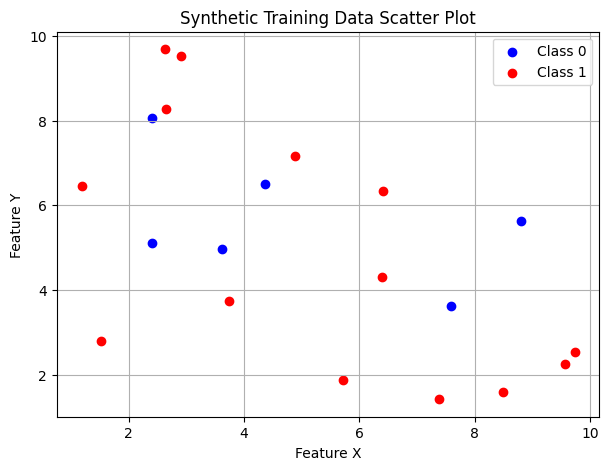

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate synthetic training data
def generate_training_data(n=20):
    np.random.seed(42)  # For reproducibility
    X = np.random.uniform(1, 10, n)
    Y = np.random.uniform(1, 10, n)
    classes = np.random.choice([0, 1], size=n)  # Randomly assign to Class 0 or 1
    return pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})

# Plot training data
def plot_training_data(df):
    plt.figure(figsize=(7, 5))
    colors = {0: 'blue', 1: 'red'}
    for class_label in df['Class'].unique():
        subset = df[df['Class'] == class_label]
        plt.scatter(subset['X'], subset['Y'], color=colors[class_label], label=f'Class {class_label}')

    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("Synthetic Training Data Scatter Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
df_train = generate_training_data()
plot_training_data(df_train)


A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1.
This creates a test set of about 10,000 points. Classify these points with above training data using
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread
and class boundary lines in the feature space.

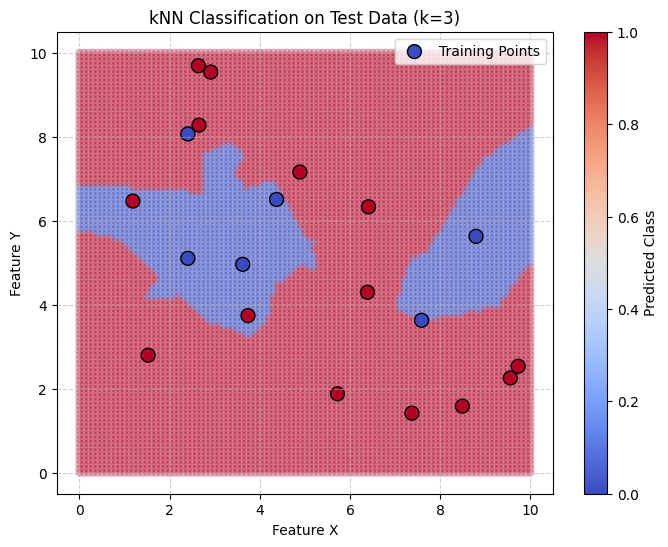

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Generate test data
def generate_test_data():
    X_test = np.arange(0, 10.1, 0.1)
    Y_test = np.arange(0, 10.1, 0.1)
    X_grid, Y_grid = np.meshgrid(X_test, Y_test)
    test_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
    return test_points, X_grid, Y_grid

# Train kNN classifier
def train_knn_classifier(df_train, k=3):
    X_train = df_train[['X', 'Y']].values
    y_train = df_train['Class'].values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Predict test data classes
def predict_test_classes(knn, test_points):
    return knn.predict(test_points)

# Plot test data classification
def plot_test_classification(X_grid, Y_grid, predictions, df_train):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_grid.ravel(), Y_grid.ravel(), c=predictions, cmap='coolwarm', alpha=0.3, edgecolors='none')
    plt.scatter(df_train['X'], df_train['Y'], c=df_train['Class'], cmap='coolwarm', edgecolors='black', marker='o', s=100, label='Training Points')
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("kNN Classification on Test Data (k=3)")
    plt.colorbar(label="Predicted Class")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Main execution
test_points, X_grid, Y_grid = generate_test_data()
df_train = generate_training_data()  # Using function from A3
knn_model = train_knn_classifier(df_train, k=3)
predictions = predict_test_classes(knn_model, test_points)
plot_test_classification(X_grid, Y_grid, predictions, df_train)


A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

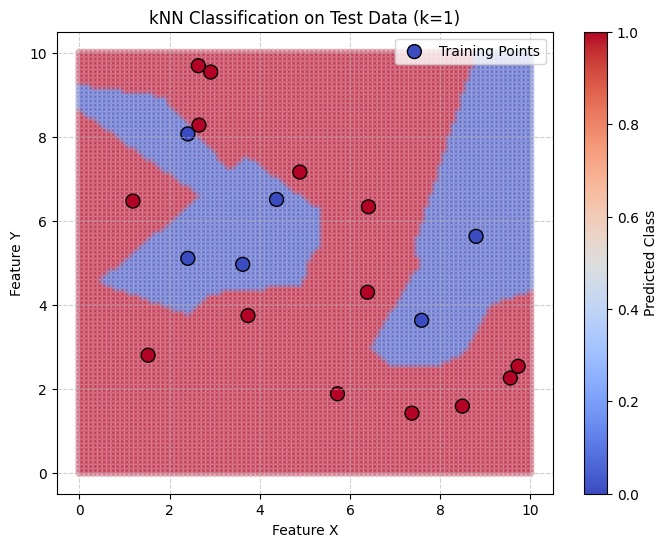

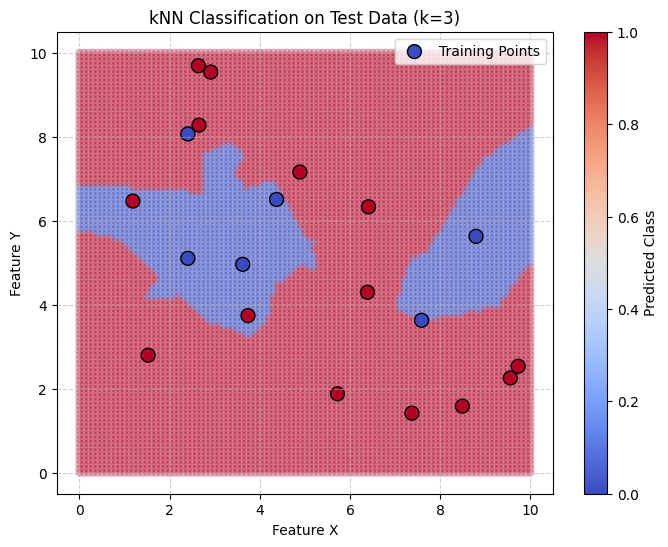

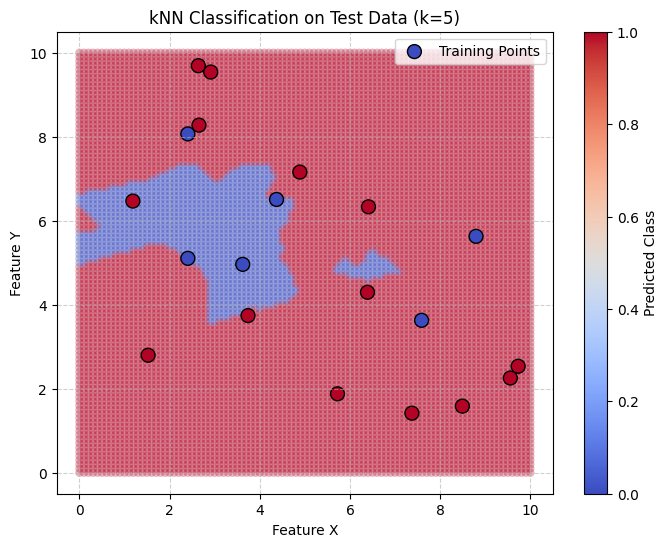

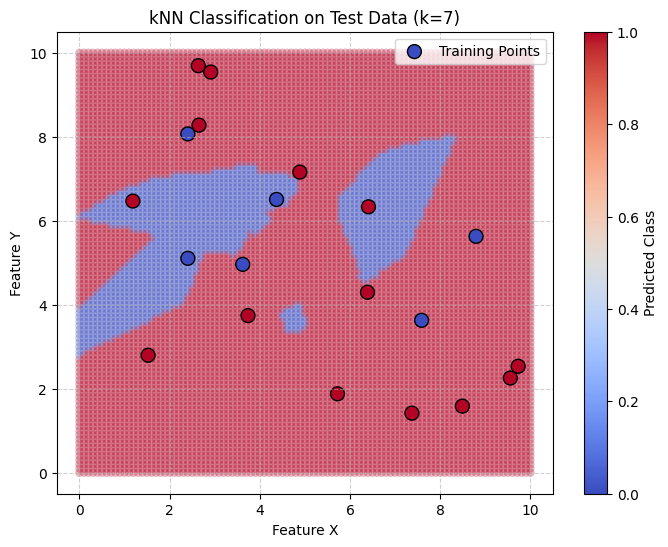

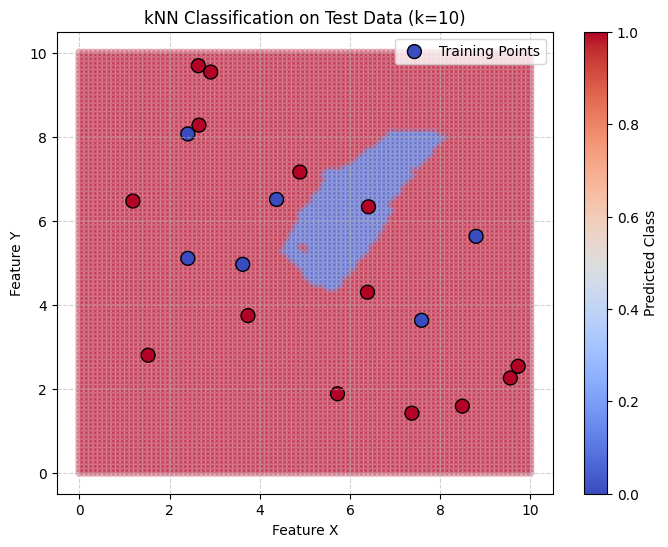

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Generate test data
def generate_test_data():
    X_test = np.arange(0, 10.1, 0.1)
    Y_test = np.arange(0, 10.1, 0.1)
    X_grid, Y_grid = np.meshgrid(X_test, Y_test)
    test_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
    return test_points, X_grid, Y_grid

# Train kNN classifier
def train_knn_classifier(df_train, k):
    X_train = df_train[['X', 'Y']].values
    y_train = df_train['Class'].values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Predict test data classes
def predict_test_classes(knn, test_points):
    return knn.predict(test_points)

# Plot test data classification
def plot_test_classification(X_grid, Y_grid, predictions, df_train, k):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_grid.ravel(), Y_grid.ravel(), c=predictions, cmap='coolwarm', alpha=0.3, edgecolors='none')
    plt.scatter(df_train['X'], df_train['Y'], c=df_train['Class'], cmap='coolwarm', edgecolors='black', marker='o', s=100, label='Training Points')
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(f"kNN Classification on Test Data (k={k})")
    plt.colorbar(label="Predicted Class")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Main execution
test_points, X_grid, Y_grid = generate_test_data()
df_train = generate_training_data()  # Using function from A3

# Test for multiple k values
k_values = [1, 3, 5, 7, 10]
for k in k_values:
    knn_model = train_knn_classifier(df_train, k)
    predictions = predict_test_classes(knn_model, test_points)
    plot_test_classification(X_grid, Y_grid, predictions, df_train, k)


A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.

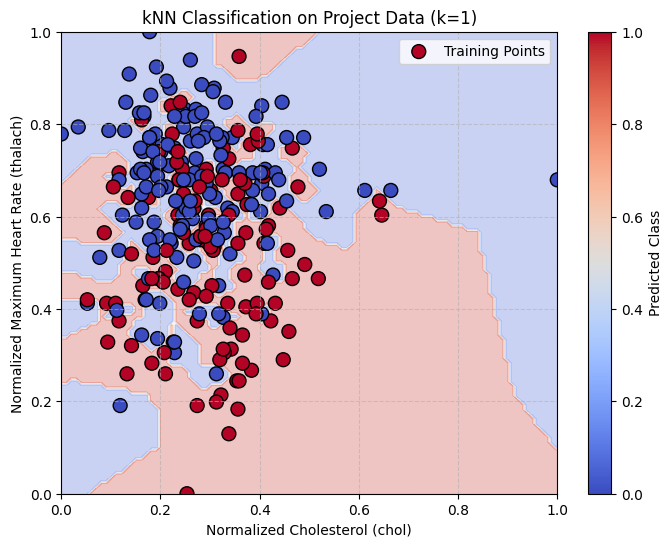

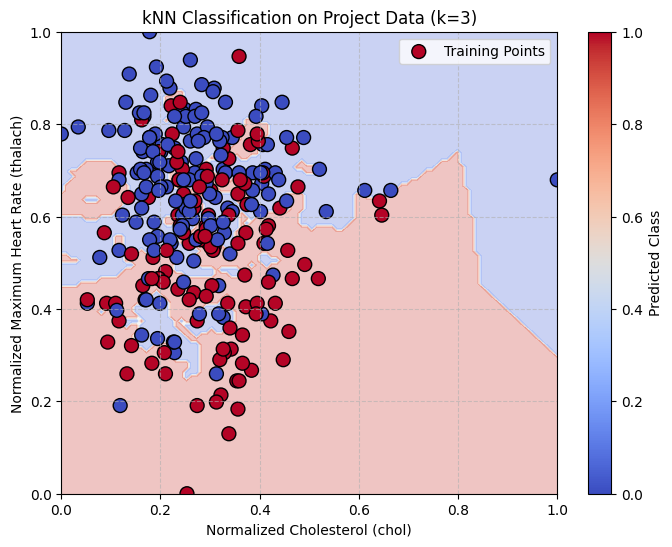

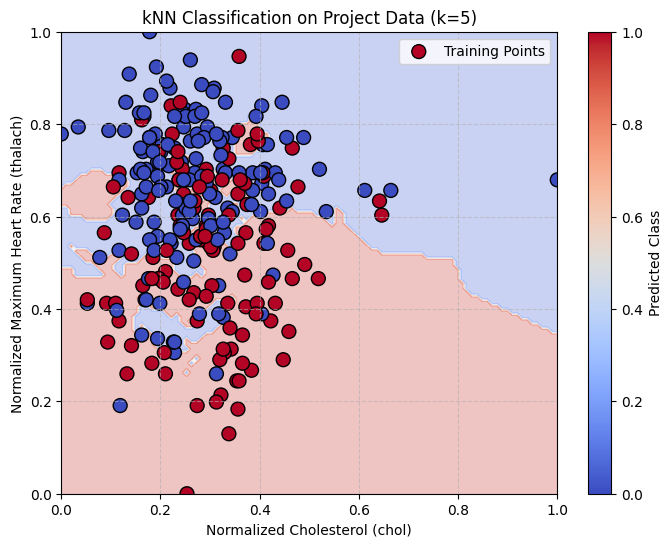

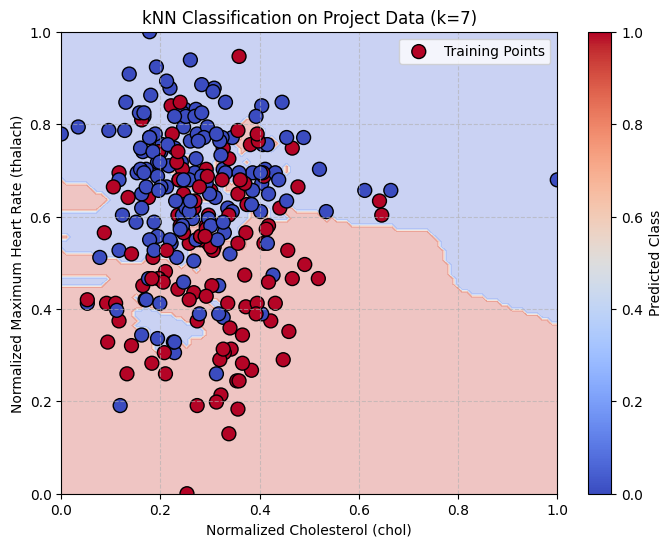

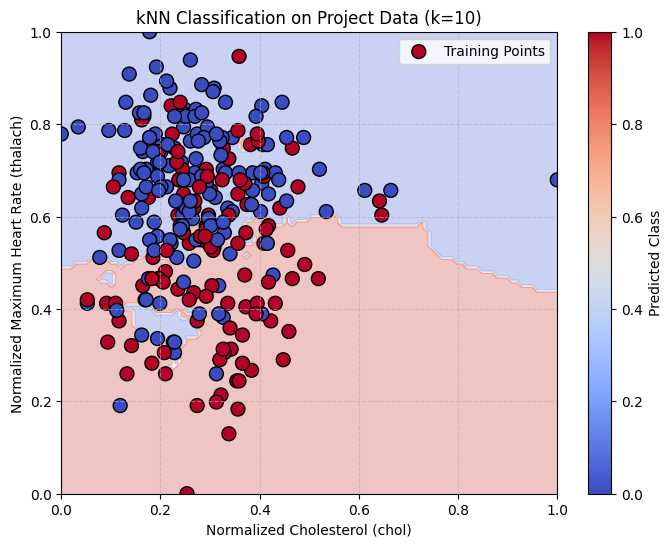

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Generate project-specific training data
def generate_project_training_data(df, feature1, feature2, class_label):
    df_train = df[[feature1, feature2, class_label]].copy()
    df_train.columns = ['X', 'Y', 'Class']

    # Normalize features
    scaler = MinMaxScaler()
    df_train[['X', 'Y']] = scaler.fit_transform(df_train[['X', 'Y']])

    return df_train, scaler

# Generate test data
def generate_test_data(scaler, df_train):
    X_test = np.linspace(df_train['X'].min(), df_train['X'].max(), 100)
    Y_test = np.linspace(df_train['Y'].min(), df_train['Y'].max(), 100)
    X_grid, Y_grid = np.meshgrid(X_test, Y_test)
    test_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
    return test_points, X_grid, Y_grid

# Train kNN classifier
def train_knn_classifier(df_train, k):
    X_train = df_train[['X', 'Y']].values
    y_train = df_train['Class'].values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Predict test data classes
def predict_test_classes(knn, test_points):
    return knn.predict(test_points)

# Plot test data classification
def plot_test_classification(X_grid, Y_grid, predictions, df_train, k):
    plt.figure(figsize=(8, 6))
    plt.contourf(X_grid, Y_grid, predictions.reshape(X_grid.shape), cmap='coolwarm', alpha=0.3)
    plt.scatter(df_train['X'], df_train['Y'], c=df_train['Class'], cmap='coolwarm', edgecolors='black', marker='o', s=100, label='Training Points')
    plt.xlabel("Normalized Cholesterol (chol)")
    plt.ylabel("Normalized Maximum Heart Rate (thalach)")
    plt.title(f"kNN Classification on Project Data (k={k})")
    plt.colorbar(label="Predicted Class")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Main execution
# Load project dataset
df_project = pd.read_csv("data.csv")  # Assuming uploaded dataset

# Select two features and class label
df_train, scaler = generate_project_training_data(df_project, 'chol', 'thalach', 'target')

test_points, X_grid, Y_grid = generate_test_data(scaler, df_train)

# Test for multiple k values
k_values = [1, 3, 5, 7, 10]
for k in k_values:
    knn_model = train_knn_classifier(df_train, k)
    predictions = predict_test_classes(knn_model, test_points)
    plot_test_classification(X_grid, Y_grid, predictions, df_train, k)


A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your
kNN classifier. This is called hyper-parameter tuning.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Generate project-specific training data
def generate_project_training_data(df, feature1, feature2, class_label):
    df_train = df[[feature1, feature2, class_label]].copy()
    df_train.columns = ['X', 'Y', 'Class']

    # Normalize features
    scaler = MinMaxScaler()
    df_train[['X', 'Y']] = scaler.fit_transform(df_train[['X', 'Y']])

    return df_train, scaler

# Train kNN classifier with GridSearchCV
def find_best_k(df_train, k_range):
    X_train = df_train[['X', 'Y']].values
    y_train = df_train['Class'].values

    param_grid = {'n_neighbors': k_range}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_['n_neighbors'], grid_search.best_score_

# Main execution
# Load project dataset
df_project = pd.read_csv("data.csv")  # Assuming uploaded dataset

# Select two features and class label
df_train, scaler = generate_project_training_data(df_project, 'chol', 'thalach', 'target')

# Find best k value
k_range = list(range(1, 21, 2))  # Test odd k values from 1 to 19
best_k, best_score = find_best_k(df_train, k_range)

print(f"Best k: {best_k}, Best Cross-Validation Accuracy: {best_score:.4f}")


Best k: 19, Best Cross-Validation Accuracy: 0.6741
